<a href="https://www.kaggle.com/code/vedatgul/nlp-analysis-with-wikipedia-dataset?scriptVersionId=141903426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

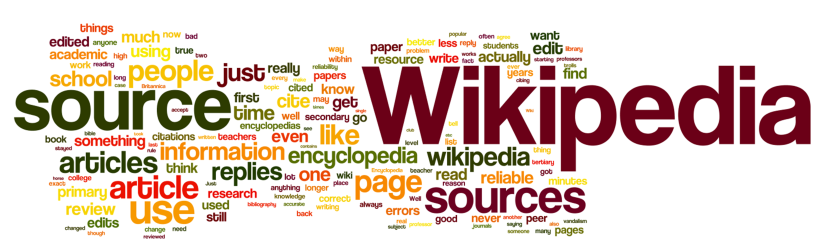

<div style="padding: 40px; background: radial-gradient(circle, #00bfbf, #00bfbf); border: 4px double #00bfbf; border-radius: 15px; box-shadow: 0 10px 10px rgba(0,0,0,0.1); font-size: 130%; line-height: 1.2; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #00bfbf; font-size: 100%; border-left: 15px solid #00bfbf; padding-left: 10px; letter-spacing: 1px;">

**NLP (Natural Language Processing)** Sentiment Analysis is a subfield of artificial intelligence and language processing that aims to identify and understand human emotions or emotional states on text data. This analysis is used to detect emotional tones, emotional expressions and moods in text content. It is also called emotional analysis or emotion recognition.
    </p>

In [1]:
# Download the libraries if you don't have
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import Word, TextBlob
from warnings import filterwarnings

In [3]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 400)

In [4]:
df = pd.read_csv("/kaggle/input/wiki-data/wiki_data.csv", index_col=0)
df.head()
df = df[:2000]

# <div style="padding: 15px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#00bfbf"><b><span style='color:#F1A424'> |</span></b> <b>Text Preprocessing</b></div>

<div style="padding: 40px; background: radial-gradient(circle, #00bfbf, #00bfbf); border: 4px double #00bfbf; border-radius: 15px; box-shadow: 0 10px 10px rgba(0,0,0,0.1); font-size: 130%; line-height: 1.2; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #00bfbf; font-size: 100%; border-left: 15px solid #00bfbf; padding-left: 10px; letter-spacing: 1px;">

**Convert Text to Lowercase:** Writing text entirely in lower case helps to avoid the difference between upper and lower case.

**Removing Punctuation:** Punctuation marks (periods, commas, exclamation marks, question marks, etc.) often add unnecessary noise to text.

**Replace Numbers with a Space:** You can replace numbers with a space character or other non-deterministic character.

**Removing stopwords:** Stop words, (e.g., "and", "or", "but", "that") are usually unimportant for text analysis and can therefore be removed.
 
**Tokenization:** Separating text at the sentence or word level breaks the text into smaller chunks and facilitates analysis.

**Lemmatisation:** These operations, called stemming operations, help to find the root of the word or convert the word to its dictionary meaning. For example, you can translate the word "running" into "run". to the word "word".
    </p>

In [5]:
# Convert Text to Lowercase
df["text"] = df["text"].str.lower()
df

,text
1,anovo\n\nanovo (formerly a novo) is a computer...
2,battery indicator\n\na battery indicator (also...
3,"bob pease\n\nrobert allen pease (august 22, 19..."
4,cavnet\n\ncavnet was a secure military forum w...
5,clidar\n\nthe clidar is a scientific instrumen...
...,...
1996,edinburgh calotype club\n\nthe edinburgh calot...
1997,endrin\n\nendrin is an organochloride with the...
1998,ethylene glycol dinitrate\n\nethylene glycol d...
1999,forges de syam\n\nthe forges de syam (syam for...


In [6]:
# Punctuations
df["text"] = df["text"].str.replace(r'[^\w\s]', '',regex=True)
df["text"] = df["text"].str.replace("\n" , '')
df

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august 22 1940â â ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...
...,...
1996,edinburgh calotype clubthe edinburgh calotype ...
1997,endrinendrin is an organochloride with the che...
1998,ethylene glycol dinitrateethylene glycol dinit...
1999,forges de syamthe forges de syam syam forges a...


In [7]:
# Replace Numbers with a Space
df["text"] = df["text"].str.replace('\d', '',regex=True)
df

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...
...,...
1996,edinburgh calotype clubthe edinburgh calotype ...
1997,endrinendrin is an organochloride with the che...
1998,ethylene glycol dinitrateethylene glycol dinit...
1999,forges de syamthe forges de syam syam forges a...


In [8]:
# Stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...
...,...
1996,edinburgh calotype clubthe edinburgh calotype ...
1997,endrinendrin organochloride chemical formula c...
1998,ethylene glycol dinitrateethylene glycol dinit...
1999,forges de syamthe forges de syam syam forges f...


In [9]:
# Find the less repetitive words in the text.
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

stumpssometimes    1
fresno             1
porteous           1
shankgiant         1
bootripping        1
                  ..
nif                1
standardsnet       1
patternsâ          1
domainsnetwork     1
fluidssolids       1
Name: count, Length: 1000, dtype: int64

In [10]:
# Rarewords
del_ = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in del_))

In [11]:
#Tokenization
df["text"].apply(lambda x: TextBlob(x).words)

1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, â, â,...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frankkamenetskii, theoryin, combustion, frank...
Name: text, Length: 2000, dtype: object

In [12]:
# Lemmatization
nltk.download('punkt')
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
1,anovoanovo formerly novo computer service comp...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pea august â â june anal...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...
...,...
1996,edinburgh calotype clubthe edinburgh calotype ...
1997,endrinendrin organochloride chemical formula c...
1998,ethylene glycol dinitrateethylene glycol dinit...
1999,forge de syamthe forge de syam syam forge forg...


# <div style="padding: 15px; color:white; margin:10; font-size:150%; text-align:left; display:fill; border-radius:10px; background-color:#00bfbf"><b><span style='color:#F1A424'> |</span></b> <b>Data Visualisation</b></div>

<div style="padding: 40px; background: radial-gradient(circle, #00bfbf, #00bfbf); border: 4px double #00bfbf; border-radius: 15px; box-shadow: 0 10px 10px rgba(0,0,0,0.1); font-size: 130%; line-height: 1.2; color: #333; font-family: 'Georgia', serif; text-align: justify; position: relative;">
    <p style="color: #00bfbf; font-size: 100%; border-left: 15px solid #00bfbf; padding-left: 10px; letter-spacing: 1px;">

**Barplot:** Barplot is a type of graph used to visualise categorical data. It is often used to show frequencies or relationships of frequently occurring categorical values.

**Word Cloud:** Word Cloud is a type of chart used to visualise text data and highlight the importance of certain words. They are visually represented in different sizes and colours according to the frequency of the words in the text. </p>

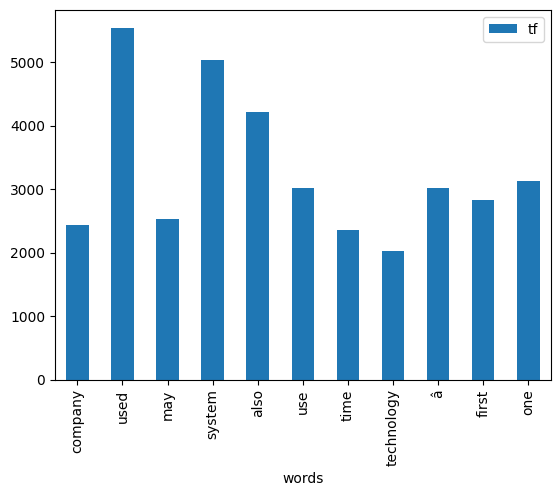

In [13]:
# Barplot
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

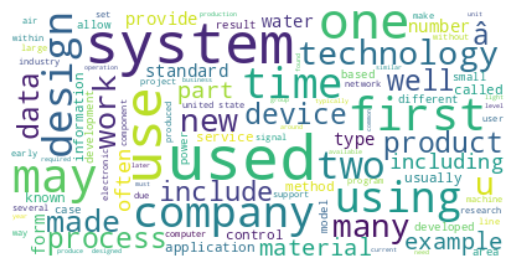

In [14]:
# WordCloud
text = " ".join(i for i in df["text"])
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()